In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [137]:
X = df[['YearsExperience']]
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [136]:
Y = df.Salary
Y.head()


0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

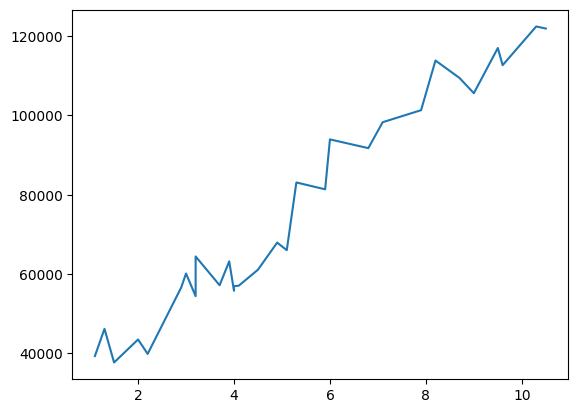

In [8]:
plt.plot(X,Y)

In [9]:
X = np.array(X)
Y = np.array(Y)

In [105]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [106]:
model.fit(X_train,Y_train)

LinearRegression()

In [107]:
predict = model.predict(X_test)
predict

array([116392.32671784,  45999.28788844,  74712.23793728,  37663.27013233,
        69154.89276654,  57113.97822993, 103425.18798611,  65449.99598604,
       108056.30896173])

In [140]:
model.score(X_test, Y_test)

0.952386141398365

In [142]:
1-(np.sum((Y_test-predict)**2)/np.sum((Y_test-np.mean(Y_test))**2))

0.952386141398365

In [109]:
model.coef_

array([9262.24195124])

In [110]:
model.intercept_

27474.80398596899

In [67]:
X_train.shape

(21, 1)

In [132]:
X_train_flatten = X_train.flatten()
X_test_flatten = X_test.flatten()
X_train_flatten

array([ 3.9, 10.5,  6.8,  9.5,  5.9,  6. ,  1.5, 10.3,  3.7,  4. ,  1.3,
        5.3,  4. ,  3.2,  4.9,  7.1,  2.9,  2.2,  9. ,  3. ,  7.9])

In [133]:
X_train_flatten.shape

(21,)

In [134]:
def gradientDescent(x,y):
    m_curr = 1
    b_curr = 1
    n = len(x)
    iteration = 10000
    learning_rate = 0.01
    prev_cost = 0
    threshold = 1e-1
    for i in range(iteration):
        y_predicted = m_curr*x + b_curr
        cost = 1/n*sum([value**2 for value in y-y_predicted])
        dm = (-2/n)*sum(x*(y-y_predicted))
        db = (-2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate*dm
        b_curr = b_curr - learning_rate*db
        print("m {}, b {}, cost {}, iteration {}".format(m_curr, b_curr, cost, i))
        
        if np.abs(cost - prev_cost)<=threshold:
            break
        prev_cost = cost
    return m_curr, b_curr

In [135]:
gradientDescent(X_train_flatten,Y_train)

m 9719.234580952381, b 1546.2800952380953, cost 6651946017.880475, iteration 0
m 12173.393885200998, b 2015.712984581406, cost 581572264.8392249, iteration 1
m 12784.630139885727, b 2211.876658566737, cost 189801167.33827478, iteration 2
m 12928.344632524631, b 2338.394608449594, cost 163563583.3317212, iteration 3
m 12953.490473923894, b 2446.9294696024776, cost 160863279.48174238, iteration 4
m 12948.600429480452, b 2550.5898568713733, cost 159686282.93762106, iteration 5
m 12936.135974047078, b 2652.7028326021905, cost 158615512.39892787, iteration 6
m 12921.795624582554, b 2754.1137745502274, cost 157559685.3907963, iteration 7
m 12907.024965836996, b 2855.038426663632, cost 156512860.1300771, iteration 8
m 12892.190571150273, b 2955.5327832322673, cost 155474588.65399444, iteration 9
m 12877.385258448981, b 3055.612303298226, cost 154444777.16426134, iteration 10
m 12862.632391882973, b 3155.2821565856993, cost 153423355.18898013, iteration 11
m 12847.937715226155, b 3254.54489722

(9263.364077435503, 27467.22437318947)

In [90]:
import random

In [124]:
class SimpleLR:
    def __init__(self, lr=0.1, max_iter=2000, threshold=1e-6):
        self.lr = lr
        self.max_iter = max_iter
        self.threshold = threshold
        self.m = random.uniform(-1,1)
        self.b = random.uniform(-1,1)
        
    def predict(self, X):
        return self.m*X + self.b
    
    def fit(self, X_train, Y_train):
        X_train_flatten = X_train.flatten()
        self.m, self.b = self.gradientDescent(X_train_flatten, Y_train)
    
    def gradientDescent(self, x, y):
        m_curr = 1
        b_curr = 1
        n = len(x)
        iteration = 10000
        learning_rate = 0.01
        prev_cost = 0
        threshold = 1e-1
        for i in range(iteration):
            y_predicted = m_curr*x + b_curr
            cost = 1/n*sum([value**2 for value in y-y_predicted])
            dm = (-2/n)*sum(x*(y-y_predicted))
            db = (-2/n)*sum(y-y_predicted)
            m_curr = m_curr - learning_rate*dm
            b_curr = b_curr - learning_rate*db
            
            if i%50 == 0:
                print("m {}, b {}, cost {}, iteration {}".format(m_curr, b_curr, cost, i))
            
            if np.abs(cost - prev_cost)<=threshold:
                print("m {}, b {}, cost {}, iteration {}".format(m_curr, b_curr, cost, i))
                break
            prev_cost = cost
        return m_curr, b_curr

In [125]:
my_model = SimpleLR()

In [126]:
my_model.fit(X_train, Y_train)

m 9719.234580952381, b 1546.2800952380953, cost 6651946017.880475, iteration 0
m 12331.80211018419, b 6740.881689041528, cost 119456226.16048165, iteration 50
m 11764.107055825238, b 10575.484868627169, cost 89113043.29138842, iteration 100
m 11301.403484954313, b 13700.90329607995, cost 68955545.76300393, iteration 150
m 10924.273910101027, b 16248.2960481292, cost 55564573.94703463, iteration 200
m 10616.891980972374, b 18324.56518898844, cost 46668721.377856426, iteration 250
m 10366.35832714369, b 20016.841946004606, cost 40759053.72862858, iteration 300
m 10162.159232295533, b 21396.14319649277, cost 36833160.009871066, iteration 350
m 9995.725423106296, b 22520.351711270603, cost 34225121.38472209, iteration 400
m 9860.07245725041, b 23436.645221663428, cost 32492556.532604318, iteration 450
m 9749.507619281849, b 24183.476246470167, cost 31341583.944296774, iteration 500
m 9659.39102420496, b 24792.185762894405, cost 30576973.08576752, iteration 550
m 9585.940903375757, b 25288.

In [143]:
my_predict = my_model.predict(X_test)
my_predict

array([[116395.51951657],
       [ 45993.95252806],
       [ 74710.38116811],
       [ 37656.92485837],
       [ 69152.36272165],
       [ 57109.98942098],
       [103426.80980816],
       [ 65447.01709068],
       [108058.49184688]])

In [150]:
my_predict = my_predict.flatten()
my_predict

array([116395.51951657,  45993.95252806,  74710.38116811,  37656.92485837,
        69152.36272165,  57109.98942098, 103426.80980816,  65447.01709068,
       108058.49184688])

In [152]:
R_squared_score = 1-(np.sum((Y_test-my_predict)**2)/np.sum((Y_test-np.mean(Y_test))**2))
R_squared_score 

0.9524085494828423

In [121]:
predict

array([116392.32671784,  45999.28788844,  74712.23793728,  37663.27013233,
        69154.89276654,  57113.97822993, 103425.18798611,  65449.99598604,
       108056.30896173])

In [122]:
X_test

array([[9.6],
       [2. ],
       [5.1],
       [1.1],
       [4.5],
       [3.2],
       [8.2],
       [4.1],
       [8.7]])